In [2]:
pip install --upgrade xlrd

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     |████████████████████████████████| 96 kB 5.0 MB/s 
  Attempting uninstall: xlrd
    Found existing installation: xlrd 1.1.0
    Uninstalling xlrd-1.1.0:
      Successfully uninstalled xlrd-1.1.0


In [3]:
!pip install --upgrade pandas

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [4]:
import pandas as pd
import numpy as np
import math
import pandas_profiling
from pandas_profiling import ProfileReport
import seaborn as sns
import matplotlib.pyplot as plt
from tqdm import tqdm_notebook
from sklearn.preprocessing import StandardScaler
from  sklearn.model_selection import train_test_split 
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import roc_auc_score, roc_curve, classification_report, confusion_matrix, f1_score, accuracy_score, precision_score, recall_score
%matplotlib inline

In [1]:
# Google Drive connection
from google.colab import drive
drive.mount('/content/drive')

MessageError: ignored

In [6]:
# Import the dataset
import pandas as pd
from google.colab import files
df = pd.read_excel("/content/default of credit card clients.xls")
df.head()

,Unnamed: 0,X1,X2,X3,X4,X5,X6,X7,X8,X9,...,X15,X16,X17,X18,X19,X20,X21,X22,X23,Y
0,ID,LIMIT_BAL,SEX,EDUCATION,MARRIAGE,AGE,PAY_0,PAY_2,PAY_3,PAY_4,...,BILL_AMT4,BILL_AMT5,BILL_AMT6,PAY_AMT1,PAY_AMT2,PAY_AMT3,PAY_AMT4,PAY_AMT5,PAY_AMT6,default payment next month
1,1,20000,2,2,1,24,2,2,-1,-1,...,0,0,0,0,689,0,0,0,0,1
2,2,120000,2,2,2,26,-1,2,0,0,...,3272,3455,3261,0,1000,1000,1000,0,2000,1
3,3,90000,2,2,2,34,0,0,0,0,...,14331,14948,15549,1518,1500,1000,1000,1000,5000,0
4,4,50000,2,2,1,37,0,0,0,0,...,28314,28959,29547,2000,2019,1200,1100,1069,1000,0


In [7]:
#Get column names
df.columns

Index(['Unnamed: 0', 'X1', 'X2', 'X3', 'X4', 'X5', 'X6', 'X7', 'X8', 'X9',
       'X10', 'X11', 'X12', 'X13', 'X14', 'X15', 'X16', 'X17', 'X18', 'X19',
       'X20', 'X21', 'X22', 'X23', 'Y'],
      dtype='object')

In [8]:
#Rename Column  names
df.rename(columns={'X1': 'LIMIT_BAL', 'Unnamed: 0': 'ID', 'X2' : 'SEX', 'X3' : 'EDUCATION', 'X4' : 'MARRIAGE', 'X5' : 'AGE'}, inplace=True)

In [9]:
column_names = {
    'history_names': {
        'X6':'Sep_Hist','X11':'Apr_Hist','X7':'Aug_Hist',
        'X8':'Jul_Hist','X9':'Jun_Hist','X10':'May_Hist'
    },
    'balance_names': {
        'X12':'Sep_Bal','X13':'Aug_Bal','X14':'Jul_Bal',
        'X15':'Jun_Bal','X16':'May_Bal','X17':'Apr_Bal'
    },
    'payment_names': {
        'X18':'Sep_Pmt','X19':'Aug_Pmt','X20':'Jul_Pmt',
        'X21':'Jun_Pmt','X22':'May_Pmt','X23':'Apr_Pmt'
    }
}

for column_name in column_names:
    df.rename(columns=column_names[column_name], inplace=True)


In [10]:
df.rename(columns={'Y': 'DEF_PAY'}, inplace=True)

In [11]:
df = df.drop([0])

In [12]:
df.columns

Index(['ID', 'LIMIT_BAL', 'SEX', 'EDUCATION', 'MARRIAGE', 'AGE', 'Sep_Hist',
       'Aug_Hist', 'Jul_Hist', 'Jun_Hist', 'May_Hist', 'Apr_Hist', 'Sep_Bal',
       'Aug_Bal', 'Jul_Bal', 'Jun_Bal', 'May_Bal', 'Apr_Bal', 'Sep_Pmt',
       'Aug_Pmt', 'Jul_Pmt', 'Jun_Pmt', 'May_Pmt', 'Apr_Pmt', 'DEF_PAY'],
      dtype='object')

# **Data Exploration**

In [13]:
df.shape

(30000, 25)

In [14]:
df.isnull().sum() 

ID           0
LIMIT_BAL    0
SEX          0
EDUCATION    0
MARRIAGE     0
AGE          0
Sep_Hist     0
Aug_Hist     0
Jul_Hist     0
Jun_Hist     0
May_Hist     0
Apr_Hist     0
Sep_Bal      0
Aug_Bal      0
Jul_Bal      0
Jun_Bal      0
May_Bal      0
Apr_Bal      0
Sep_Pmt      0
Aug_Pmt      0
Jul_Pmt      0
Jun_Pmt      0
May_Pmt      0
Apr_Pmt      0
DEF_PAY      0
dtype: int64

In [15]:
df.dtypes 

ID           object
LIMIT_BAL    object
SEX          object
EDUCATION    object
MARRIAGE     object
AGE          object
Sep_Hist     object
Aug_Hist     object
Jul_Hist     object
Jun_Hist     object
May_Hist     object
Apr_Hist     object
Sep_Bal      object
Aug_Bal      object
Jul_Bal      object
Jun_Bal      object
May_Bal      object
Apr_Bal      object
Sep_Pmt      object
Aug_Pmt      object
Jul_Pmt      object
Jun_Pmt      object
May_Pmt      object
Apr_Pmt      object
DEF_PAY      object
dtype: object

In [16]:
col = df.columns
for i in col:
  df[i] = df[i].astype(int)

df.dtypes

ID           int64
LIMIT_BAL    int64
SEX          int64
EDUCATION    int64
MARRIAGE     int64
AGE          int64
Sep_Hist     int64
Aug_Hist     int64
Jul_Hist     int64
Jun_Hist     int64
May_Hist     int64
Apr_Hist     int64
Sep_Bal      int64
Aug_Bal      int64
Jul_Bal      int64
Jun_Bal      int64
May_Bal      int64
Apr_Bal      int64
Sep_Pmt      int64
Aug_Pmt      int64
Jul_Pmt      int64
Jun_Pmt      int64
May_Pmt      int64
Apr_Pmt      int64
DEF_PAY      int64
dtype: object

In [17]:
col = df.columns
col

Index(['ID', 'LIMIT_BAL', 'SEX', 'EDUCATION', 'MARRIAGE', 'AGE', 'Sep_Hist',
       'Aug_Hist', 'Jul_Hist', 'Jun_Hist', 'May_Hist', 'Apr_Hist', 'Sep_Bal',
       'Aug_Bal', 'Jul_Bal', 'Jun_Bal', 'May_Bal', 'Apr_Bal', 'Sep_Pmt',
       'Aug_Pmt', 'Jul_Pmt', 'Jun_Pmt', 'May_Pmt', 'Apr_Pmt', 'DEF_PAY'],
      dtype='object')

In [18]:
df['DEF_PAY'].value_counts()

0    23364
1     6636
Name: DEF_PAY, dtype: int64

In [19]:
df.head()

,ID,LIMIT_BAL,SEX,EDUCATION,MARRIAGE,AGE,Sep_Hist,Aug_Hist,Jul_Hist,Jun_Hist,...,Jun_Bal,May_Bal,Apr_Bal,Sep_Pmt,Aug_Pmt,Jul_Pmt,Jun_Pmt,May_Pmt,Apr_Pmt,DEF_PAY
1,1,20000,2,2,1,24,2,2,-1,-1,...,0,0,0,0,689,0,0,0,0,1
2,2,120000,2,2,2,26,-1,2,0,0,...,3272,3455,3261,0,1000,1000,1000,0,2000,1
3,3,90000,2,2,2,34,0,0,0,0,...,14331,14948,15549,1518,1500,1000,1000,1000,5000,0
4,4,50000,2,2,1,37,0,0,0,0,...,28314,28959,29547,2000,2019,1200,1100,1069,1000,0
5,5,50000,1,2,1,57,-1,0,-1,0,...,20940,19146,19131,2000,36681,10000,9000,689,679,0


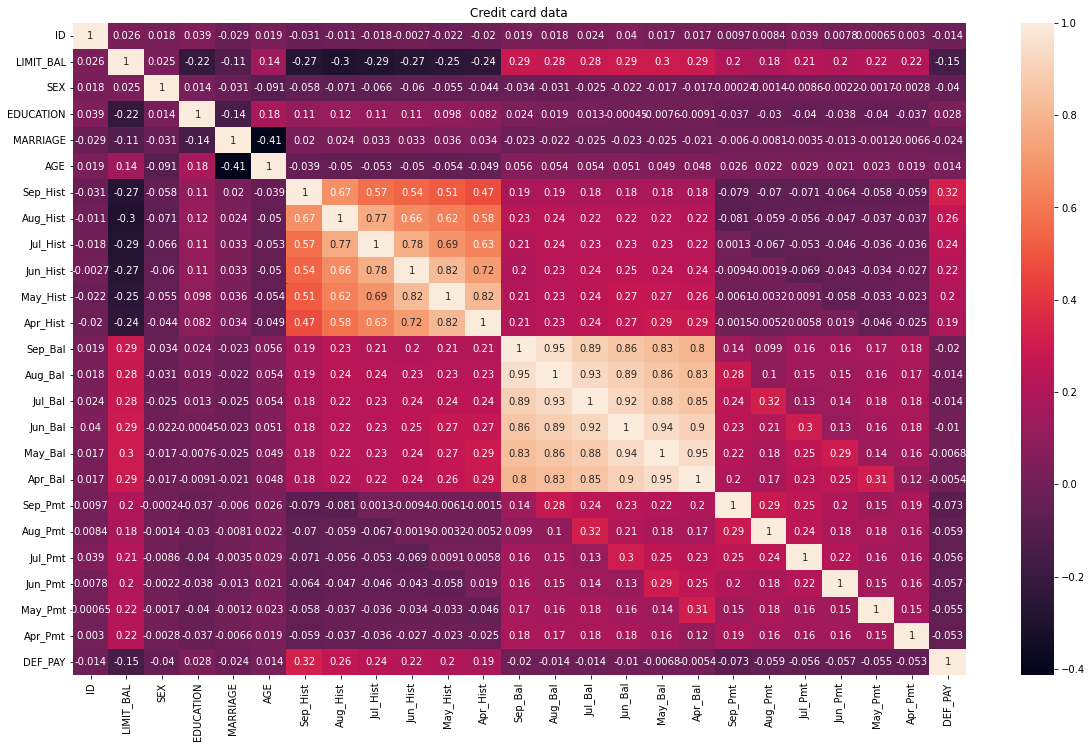

In [20]:
# Correlation plot 
fig, ax = plt.subplots(figsize=(20, 12))
dfcorr=df.corr()
sns.heatmap(dfcorr, annot=True).set(title="Credit card data");

In [21]:
df.corr()['DEF_PAY']

ID          -0.013952
LIMIT_BAL   -0.153520
SEX         -0.039961
EDUCATION    0.028006
MARRIAGE    -0.024339
AGE          0.013890
Sep_Hist     0.324794
Aug_Hist     0.263551
Jul_Hist     0.235253
Jun_Hist     0.216614
May_Hist     0.204149
Apr_Hist     0.186866
Sep_Bal     -0.019644
Aug_Bal     -0.014193
Jul_Bal     -0.014076
Jun_Bal     -0.010156
May_Bal     -0.006760
Apr_Bal     -0.005372
Sep_Pmt     -0.072929
Aug_Pmt     -0.058579
Jul_Pmt     -0.056250
Jun_Pmt     -0.056827
May_Pmt     -0.055124
Apr_Pmt     -0.053183
DEF_PAY      1.000000
Name: DEF_PAY, dtype: float64

Default Data Distribution

In [22]:
for i in col:
  print (i,df[i].min(), df[i].max())

ID 1 30000
LIMIT_BAL 10000 1000000
SEX 1 2
EDUCATION 0 6
MARRIAGE 0 3
AGE 21 79
Sep_Hist -2 8
Aug_Hist -2 8
Jul_Hist -2 8
Jun_Hist -2 8
May_Hist -2 8
Apr_Hist -2 8
Sep_Bal -165580 964511
Aug_Bal -69777 983931
Jul_Bal -157264 1664089
Jun_Bal -170000 891586
May_Bal -81334 927171
Apr_Bal -339603 961664
Sep_Pmt 0 873552
Aug_Pmt 0 1684259
Jul_Pmt 0 896040
Jun_Pmt 0 621000
May_Pmt 0 426529
Apr_Pmt 0 528666
DEF_PAY 0 1


In [23]:
print('SEX' + str(sorted(df['SEX'].unique())))
print('EDUCATION' + str(sorted(df['EDUCATION'].unique())))
print('MARRIAGE' + str(sorted(df['MARRIAGE'].unique())))
print('Sep_Hist' + str(sorted(df['Sep_Hist'].unique())))
print('DEF_PAY' + str(sorted(df['DEF_PAY'].unique())))

SEX[1, 2]
EDUCATION[0, 1, 2, 3, 4, 5, 6]
MARRIAGE[0, 1, 2, 3]
Sep_Hist[-2, -1, 0, 1, 2, 3, 4, 5, 6, 7, 8]
DEF_PAY[0, 1]


In [24]:
# Some categories are undocumented

# The 0, 5 and 6 in EDUCATION can be categorized as 'Other' (4)
fill = (df['EDUCATION']==0) | (df['EDUCATION']==5) | (df['EDUCATION']==6)
df.loc[fill, 'EDUCATION']=4

# The 0 in MARRIAGE can be categorized as 'Other' (3)
df.loc[df['MARRIAGE']==0, 'MARRIAGE']=3

# The -2, -1 and 0 in PAY_n can be categorized as 'duly' (0)
fill = (df['Sep_Hist']==-2) | (df['Sep_Hist']==-1) | (df['Sep_Hist']==0)
df.loc[fill, 'Sep_Hist']=0

fill = (df['Aug_Hist']==-2) | (df['Aug_Hist']==-1) | (df['Aug_Hist']==0)
df.loc[fill, 'Aug_Hist']=0

fill = (df['Jul_Hist']==-2) | (df['Jul_Hist']==-1) | (df['Jul_Hist']==0)
df.loc[fill, 'Jul_Hist']=0

fill = (df['Jun_Hist']==-2) | (df['Jun_Hist']==-1) | (df['Jun_Hist']==0)
df.loc[fill, 'Jun_Hist']=0

fill = (df['May_Hist']==-2) | (df['May_Hist']==-1) | (df['May_Hist']==0)
df.loc[fill, 'May_Hist']=0

fill = (df['Apr_Hist']==-2) | (df['Apr_Hist']==-1) | (df['Apr_Hist']==0)
df.loc[fill, 'Apr_Hist']=0

In [25]:
print('SEX' + str(sorted(df['SEX'].unique())))
print('EDUCATION' + str(sorted(df['EDUCATION'].unique())))
print('MARRIAGE' + str(sorted(df['MARRIAGE'].unique())))
print('Sep_Hist' + str(sorted(df['Sep_Hist'].unique())))
print('DEF_PAY' + str(sorted(df['DEF_PAY'].unique())))

SEX[1, 2]
EDUCATION[1, 2, 3, 4]
MARRIAGE[1, 2, 3]
Sep_Hist[0, 1, 2, 3, 4, 5, 6, 7, 8]
DEF_PAY[0, 1]


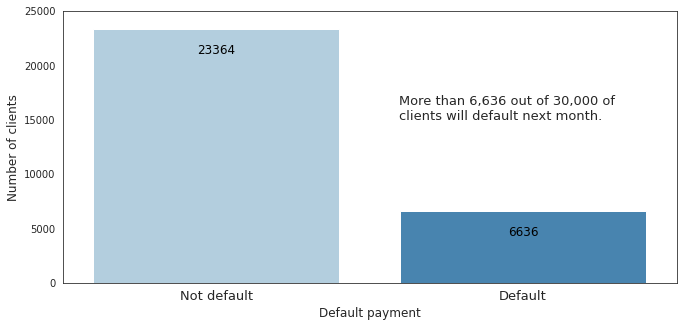

In [26]:
plt.figure(figsize=(11,5))
sns.set_style('white')
ax = sns.countplot(data=df, x='DEF_PAY', palette='Blues')

ax.set_xlabel('Default payment', fontsize=12)
for p in ax.patches:
    ax.annotate(f'\n{p.get_height()}', (p.get_x()+0.4, p.get_height()), ha='center', va='top', color='black', size=12)

plt.ylim(0,25000)
plt.annotate('More than 6,636 out of 30,000 of \nclients will default next month.', xy=(0.595, 15000), fontsize=13)
plt.xticks([0,1],['Not default', 'Default'], fontsize=13); plt.ylabel('Number of clients', fontsize=12)
plt.show()

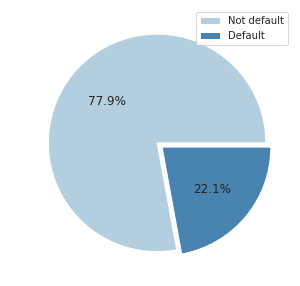

In [27]:
plt.figure(figsize=(5,5))

df['DEF_PAY'].value_counts().plot(kind='pie', labels=['',''], 
                                        autopct='%1.1f%%', colors=['#B3CEDE','#4884AF'], 
                                        explode=[0,0.06], textprops={"fontsize":12})

plt.ylabel(' ')
plt.legend(labels=['Not default','Default'])
plt.show()


Default Data Distribution by Sex

In [28]:
df['DEF_PAY'].groupby(df['SEX']).value_counts(normalize=True) 

SEX  DEF_PAY
1    0          0.758328
     1          0.241672
2    0          0.792237
     1          0.207763
Name: DEF_PAY, dtype: float64

In [29]:
colors = ['#B3CEDE', '#4884AF']
clientes = ['Not default', 'Default']
counter = df['DEF_PAY'].groupby(df['SEX']).value_counts().unstack()
p_dist = 100 * counter.divide(counter.sum(axis = 1), axis=0)

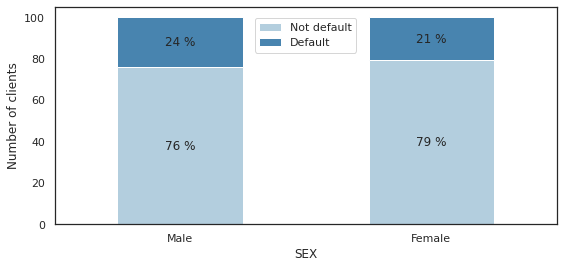

In [30]:
sns.set(rc={'figure.figsize':(9,4)})
sns.set_style("white")

ax = p_dist.plot.bar(stacked=True, color=colors)

for p in ax.patches:
    width, height = p.get_width(), p.get_height()
    x, y = p.get_xy() 
    ax.text(x+width/2, y+height/2, '{:.0f} %'.format(height), horizontalalignment='center', verticalalignment='center')

plt.legend(clientes, loc=(0.398, 0.79), fontsize = 11)   
plt.xticks([0,1],['Male','Female'], rotation='horizontal'); plt.ylabel('Number of clients', fontsize = 12)
plt.show()

Default Data Distribution by Age

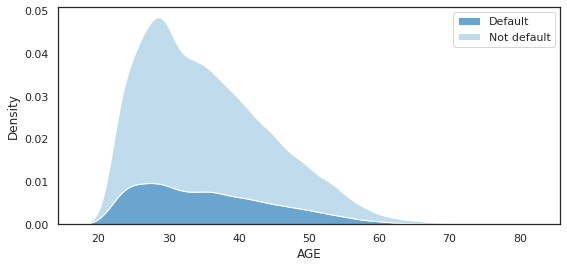

In [31]:
plt.figure(figsize=(9,4))
sns.kdeplot(data=df, x='AGE', hue='DEF_PAY', multiple='stack', palette='Blues')

plt.legend(loc='upper right', labels=['Default', 'Not default'])
plt.ylabel('Density', fontsize= 12)
plt.show()

Default Data Distribution by Education 

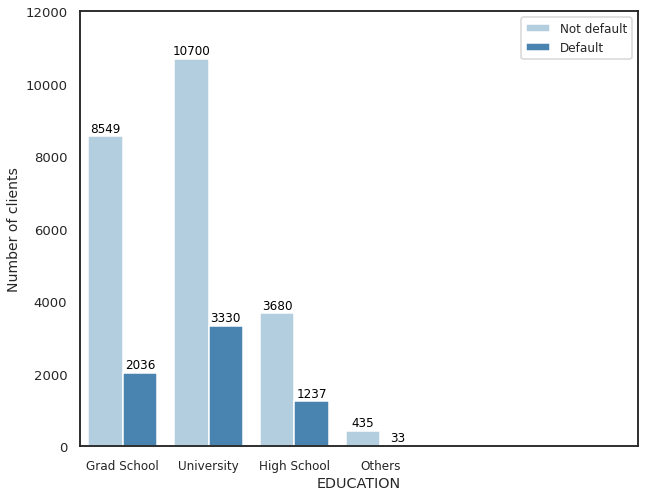

In [32]:
plt.figure(figsize=(10,8))
sns.set_context('talk', font_scale=0.8)

ax = sns.countplot(data=df, x='EDUCATION', hue='DEF_PAY', palette='Blues')
for p in ax.patches:
    ax.annotate(f'\n{p.get_height()}', (p.get_x()+0.2, p.get_height()+800), ha='center', va='top', color='black', size=12)

plt.ylim(0,12000)
plt.xticks([0,1,2,3,4,5,6], ['Grad School', 'University', 'High School', 'Others'], fontsize=12);plt.ylabel('Number of clients', fontsize = 14)
plt.legend(labels=['Not default', 'Default'], fontsize=12)
plt.show()

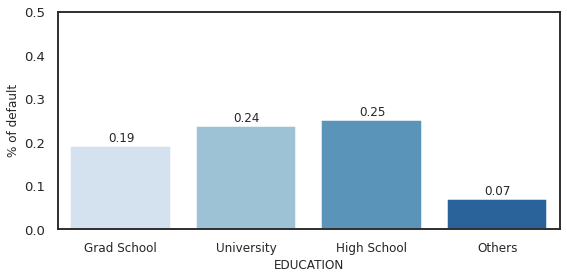

In [33]:
plt.figure(figsize=(9,4))
sns.set_style('white')

ax = sns.barplot(x='EDUCATION', y='DEF_PAY', data=df, palette='Blues', ci=None)

for p in ax.patches:
    ax.annotate('%.2f' %(p.get_height()), (p.get_x()+0.30, p.get_height()+0.01), size=12)

plt.ylabel('% of default', fontsize= 12)
plt.ylim(0,0.5)
plt.xticks([0,1,2,3],['Grad School', 'University', 'High School', 'Others'], fontsize = 12); plt.xlabel('EDUCATION', fontsize = 12)
plt.show()

Default Data Distribution by Marital Status

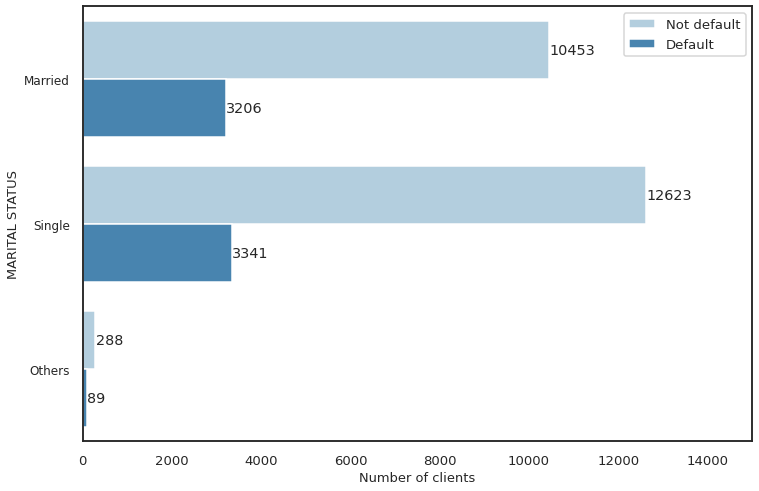

In [34]:

plt.figure(figsize=(12,8))
sns.set_style('white')

ax = sns.countplot(data=df, y='MARRIAGE', hue='DEF_PAY', palette='Blues')

for p in ax.patches:
  height = p.get_height()
  width = p.get_width()
  ax.text(x=width+3,
  y = p.get_y()+(height/2),
  s = '{:.0f}'.format(width),
  va = 'center')

plt.xlim(0,15000)
plt.ylabel('MARITAL STATUS', fontsize=13)
plt.yticks([0,1,2],['Married','Single','Others'], fontsize=12);plt.xlabel('Number of clients', fontsize=13)
plt.legend(labels=['Not default', 'Default'])
plt.show()


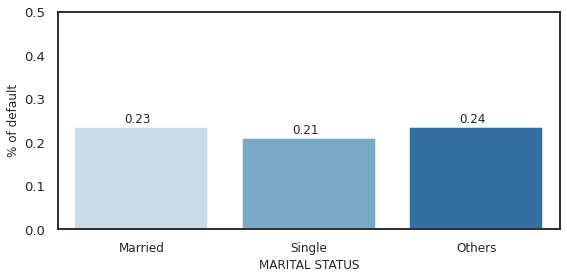

In [35]:
plt.figure(figsize=(9,4))
sns.set_style('white')

ax = sns.barplot(x='MARRIAGE', y='DEF_PAY', data=df, palette='Blues', ci=None)

for p in ax.patches:
    ax.annotate("%.2f" %(p.get_height()), (p.get_x()+0.30, p.get_height()+0.01), size=12)

plt.ylabel('% of default', fontsize= 12)
plt.ylim(0,0.5)
plt.xticks([0,1,2], ['Married','Single','Others'], fontsize = 12); plt.xlabel('MARITAL STATUS', fontsize=12)
plt.show()

Corelation

# **Data Spliting**

In [36]:
df.head()

,ID,LIMIT_BAL,SEX,EDUCATION,MARRIAGE,AGE,Sep_Hist,Aug_Hist,Jul_Hist,Jun_Hist,...,Jun_Bal,May_Bal,Apr_Bal,Sep_Pmt,Aug_Pmt,Jul_Pmt,Jun_Pmt,May_Pmt,Apr_Pmt,DEF_PAY
1,1,20000,2,2,1,24,2,2,0,0,...,0,0,0,0,689,0,0,0,0,1
2,2,120000,2,2,2,26,0,2,0,0,...,3272,3455,3261,0,1000,1000,1000,0,2000,1
3,3,90000,2,2,2,34,0,0,0,0,...,14331,14948,15549,1518,1500,1000,1000,1000,5000,0
4,4,50000,2,2,1,37,0,0,0,0,...,28314,28959,29547,2000,2019,1200,1100,1069,1000,0
5,5,50000,1,2,1,57,0,0,0,0,...,20940,19146,19131,2000,36681,10000,9000,689,679,0


In [37]:
X = df.iloc[:,:-1]
y = df['DEF_PAY']

In [38]:
#Split the data
X_train, X_test, y_train, y_test = train_test_split(X, y , test_size=0.25, random_state=0)

# **scaling the data**

In [39]:
for i in col:
  print (i,df[i].min(), df[i].max())

ID 1 30000
LIMIT_BAL 10000 1000000
SEX 1 2
EDUCATION 1 4
MARRIAGE 1 3
AGE 21 79
Sep_Hist 0 8
Aug_Hist 0 8
Jul_Hist 0 8
Jun_Hist 0 8
May_Hist 0 8
Apr_Hist 0 8
Sep_Bal -165580 964511
Aug_Bal -69777 983931
Jul_Bal -157264 1664089
Jun_Bal -170000 891586
May_Bal -81334 927171
Apr_Bal -339603 961664
Sep_Pmt 0 873552
Aug_Pmt 0 1684259
Jul_Pmt 0 896040
Jun_Pmt 0 621000
May_Pmt 0 426529
Apr_Pmt 0 528666
DEF_PAY 0 1


In [40]:
col = col[0:-1]
col

Index(['ID', 'LIMIT_BAL', 'SEX', 'EDUCATION', 'MARRIAGE', 'AGE', 'Sep_Hist',
       'Aug_Hist', 'Jul_Hist', 'Jun_Hist', 'May_Hist', 'Apr_Hist', 'Sep_Bal',
       'Aug_Bal', 'Jul_Bal', 'Jun_Bal', 'May_Bal', 'Apr_Bal', 'Sep_Pmt',
       'Aug_Pmt', 'Jul_Pmt', 'Jun_Pmt', 'May_Pmt', 'Apr_Pmt'],
      dtype='object')

In [41]:
# Normalizing input variables of Train data to same scale
scalar = StandardScaler()
X_train[col] = scalar.fit_transform(X_train[col])

In [42]:
df['DEF_PAY'].value_counts()

0    23364
1     6636
Name: DEF_PAY, dtype: int64

In [43]:
# Applting SMOTE technique to balance the data
from imblearn.over_sampling import SMOTE
sm = SMOTE(random_state=42)
X_train, y_train = sm.fit_resample(X_train, y_train)
X_test, y_test = sm.fit_resample(X_test, y_test)

In [44]:
y_train.value_counts()

0    17496
1    17496
Name: DEF_PAY, dtype: int64

In [45]:
y_test.value_counts()

0    5868
1    5868
Name: DEF_PAY, dtype: int64

In [46]:
# Normalizing input variables of Test data to same scale
scalar = StandardScaler()
X_test[col] = scalar.fit_transform(X_test[col])

#Performing onehot encoding on categorical variables
# X_test = pd.get_dummies(X_test, columns = ['destination', 'weather', 'passanger', 'age', 'coupon', 'maritalStatus',
#                                 'education', 'occupation', 'income', 'Bar', 'CoffeeHouse', 'CarryAway',
#                                 'RestaurantLessThan20', 'Restaurant20To50'])


# **Model Selection and Model Exploration**

Logistic Regression

In [ ]:
# Logistic Regression
class LogisticRegression:
  def __init__(self, X, y, learningRate, tolerance, maxIteration):
      self.X=X
      self.y=y
      self.learningRate = learningRate
      self.tolerance =  tolerance
      self.maxIteration = maxIteration
  
  def addX0(self, X):
    return np.column_stack([np.ones(X.shape[0]),X])

  def sigmoid(self, z):
    sig =  1 / (1 +  np.exp(-z))
    return sig

  def costFunction(self, X, y):
    pred_ = np.log(np.ones(X.shape[0]) + np.exp(X.dot(self.w))) - X.dot(self.w).dot(y)
    cost = pred_.sum()
    return cost
    
  def gradient(self, X, y):
    sig = self.sigmoid(X.dot(self.w))
    grad = (sig - y).dot(X)
    return grad
  
  def gradientDescent(self, X, y):
    errors = []
    last = float('inf')

    for i in tqdm_notebook(range(self.maxIteration)):
      self.w = self.w - self.learningRate * self.gradient(X,y)
      curr = self.costFunction(X, y)
      diff = last - curr
      last = curr

      errors.append(curr)
      if diff < self.tolerance:
        print("Model Stopped")
        break
      
    self.plot_cost(errors)
    return

  def predict(self, X):
    sig = self.sigmoid(X.dot(self.w))
    return np.around(sig)

    
  def evaluate(self, y, y_hat):
    test_error = []
    y = (y == 1)
    y_hat = (y_hat == 1)

    accuracy = (y==y_hat).sum() / y.size
    precision = (y & y_hat).sum() / y_hat.sum()
    recall = (y & y_hat).sum() / y.sum()
    

    fScore = 2* (precision*recall) / (precision+recall)
    return fScore, recall, precision, accuracy

  def run_model(self, X_test, y_test ):
    self.X_train =  self.X
    self.y_train = self.y
    self.X_test = X_test
    self.y_test = y_test
    self.w = np.ones(self.X.shape[1], dtype= np.float64) * 0
    self.gradientDescent(self.X, self.y)

    y_hat_train = self.predict(self.X)
    fScore, accuracy, recall, precision = self.evaluate(self.y, y_hat_train)

    print("Training set Performance")
    print(confusion_matrix(self.y, y_hat_train))
    print("F1_Score is :" , fScore)
    print("Accuracy is :" , accuracy)
    print("Precision is :" , precision)
    print("Recall is :" , recall)


    y_hat_test = self.predict(self.X_test)
    fScore, accuracy, recall, precision = self.evaluate(self.y_test, y_hat_test)

    print("Test set Performance")
    print(confusion_matrix(self.y_test, y_hat_test))
    print("F1_Score is :" , fScore)
    print("Accuracy is :" , accuracy)
    print("Precision is :" , precision)
    print("Recall is :" , recall)
 
  def plot(self):
    plt.figure(figsize=(12, 8))
    ax = plt.axes(projection='3d')
    print(self.X_train[:, 0])
    print(self.self.X_train[:, 1])


        # Data for three-dimensional scattered points
    ax.scatter3D(self.X_train[:, 0], self.X_train[:, 1], self.sigmoid(self.X_train.dot(self.w)),c = self.y_train[:], cmap='viridis', s=100);

    ax.set_xlim3d(55, 80)
    ax.set_ylim3d(80, 240)
    plt.xlabel('$x_1$ feature', fontsize=15)
    plt.ylabel('$x_2$ feature', fontsize=15, )
    ax.set_zlabel('$P(Y = 1|x_1, x_2)$', fontsize=15, rotation = 0)
  
  def plot_cost(self, cost_sequence):
        # Data for plotting
    s = np.array(cost_sequence)
    t = np.arange(s.size)

    fig, ax = plt.subplots()
    ax.plot(t, s)

    ax.set(xlabel='iterations', ylabel='cost',
                title='cost trend')
    ax.grid()

    plt.legend(bbox_to_anchor=(1.05,1), loc=2, shadow=True)
    plt.show()
   

In [ ]:
#Run model
#lr = [0.000001, 0.00001, 0.0001, 0.001, 0.01]
#tol = [0.0000005, 0.000005, 0.00005, 0.0005, 0.005]
#for i in lr:
  #for j in tol:
    #print ('learning rate: ', i, ' tolerance : ', j)

    #lr = LogisticRegression(X_train, y_train, learningRate=i, tolerance=j, maxIteration=5000)
    #lr.run_model(X_test, y_test)

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:31: TqdmDeprecationWarning: This function will be removed in tqdm==5.0.0
Please use `tqdm.notebook.tqdm` instead of `tqdm.tqdm_notebook`


  0%|          | 0/5000 [00:00<?, ?it/s]

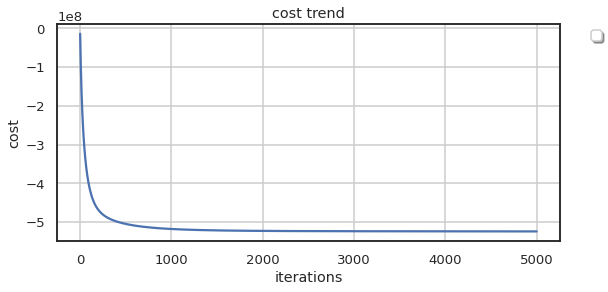

Training set Performance
[[13874  3622]
 [ 6763 10733]]
F1_Score is : 0.6739505823992968
Accuracy is : 0.6134545038866026
Precision is : 0.7032178783721994
Recall is : 0.7476837338906305
Test set Performance
[[4938  930]
 [2745 3123]]
F1_Score is : 0.6295736316903539
Accuracy is : 0.5322085889570553
Precision is : 0.6868609406952966
Recall is : 0.770540340488527


In [ ]:
#learning rate:  1e-06  tolerance :  5e-07
lr = LogisticRegression(X_train, y_train, learningRate = 1e-06, tolerance = 5e-07, maxIteration=5000)
lr.run_model(X_test, y_test)

Neural Networks



In [ ]:
from keras.utils.np_utils import to_categorical
from sklearn.model_selection import KFold, cross_val_score, train_test_split
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras import layers
from tensorflow.keras.models import Sequential
from tensorflow.keras.preprocessing import image_dataset_from_directory
from tensorflow.keras.layers import Conv2D, MaxPooling2D, Activation
from keras.layers import Activation, Dense
from tensorflow.keras.losses import SparseCategoricalCrossentropy

In [ ]:
# model = Sequential()
# model.add(Dense(units=56, input_dim=24, activation='relu'))
# model.add(Dense(128,activation='relu'))
# #model.add(Dense(256,activation='relu'))
# #model.add(Dense(512,activation='relu'))
# model.add(Dense(2, activation='sigmoid'))

In [ ]:
from keras import regularizers
model = Sequential()
model.add(Dense(units=64, input_dim=24, activation='relu'))
model.add(Dense(64, input_dim=64, activation='relu', kernel_regularizer=regularizers.l2(0.01)))
#model.add(Dense(32, input_dim=32, kernel_regularizer=regularizers.l2(0.001)))
model.add(Dense(2, activation='sigmoid'))

In [ ]:
# from keras.layers.core import Dropout

# model = Sequential([
#  Dense(output_dim = 56, input_dim=24, activation='relu'),
#  Dropout(0.25),

# Dense(output_dim=128, input_dim=56, activation='relu'),
# Dense(2, activation='sigmoid')
#  ])

In [ ]:
model.compile(optimizer=tf.keras.optimizers.Adam(0.00001),
              loss=SparseCategoricalCrossentropy(from_logits=True),
              metrics=[tf.keras.metrics.SparseCategoricalAccuracy()])

In [ ]:
history=model.fit(X_train,y_train,epochs=1000, verbose=1, batch_size=150)

In [ ]:
# evaluate the model
train_acc = model.evaluate(X_train, y_train, verbose=0)
test_acc = model.evaluate(X_test, y_test, verbose=0)

/usr/local/lib/python3.7/dist-packages/tensorflow/python/util/dispatch.py:1082: UserWarning: "`sparse_categorical_crossentropy` received `from_logits=True`, but the `output` argument was produced by a sigmoid or softmax activation and thus does not represent logits. Was this intended?"
  return dispatch_target(*args, **kwargs)


In [ ]:
# Predicting y values on train and test set
y_prd_train =  np.around(model.predict(X_train))
y_prd_test = np.around(model.predict(X_test))

train=[]
for i in range(0,len(y_prd_train)):
     j=np.argmax(y_prd_train[i])
     print(j)
     train.append(j)

y_prd_train = np.array(train)

test=[]
for i in range(0,len(y_prd_test)):
     j=np.argmax(y_prd_test[i])
     print(j)
     test.append(j)

y_prd_test = np.array(test)

In [ ]:
#Performance metrics 
print("Performance evaluation on training data")
print(confusion_matrix(y_train, y_prd_train))
print("F1_Score is :" , f1_score(y_train, y_prd_train))
print("Accuracy is :" , accuracy_score(y_train, y_prd_train))
print("Precision is :" , precision_score(y_train, y_prd_train))
print("Recall is :" , recall_score(y_train, y_prd_train))

print("Performance evaluation on test data")
print(confusion_matrix(y_test, y_prd_test))
print("F1_Score is :" , f1_score(y_test, y_prd_test))
print("Accuracy is :" , accuracy_score(y_test, y_prd_test))
print("Precision is :" , precision_score(y_test, y_prd_test))
print("Recall is :" , recall_score(y_test, y_prd_test))

Performance evaluation on training data
[[14145  3351]
 [ 5974 11522]]
F1_Score is : 0.7119157218326175
Accuracy is : 0.733510516689529
Precision is : 0.7746923956162173
Recall is : 0.6585505258344765
Performance evaluation on test data
[[5133  735]
 [2795 3073]]
F1_Score is : 0.635179826374535
Accuracy is : 0.6992160872528971
Precision is : 0.8069852941176471
Recall is : 0.5236877982276755


SVM

In [ ]:
y_train_c = y_train.replace({0: -1}).copy()

In [ ]:
y_train_c

0       -1
1       -1
2        1
3        1
4        1
        ..
17995    1
17996   -1
17997   -1
17998   -1
17999   -1
Name: DEF_PAY, Length: 18000, dtype: int64

In [ ]:
y_test_c = y_test.replace({0: -1}).copy()

In [ ]:
y_test_c

12086    1
4522    -1
26102   -1
28494   -1
169     -1
        ..
199     -1
2775    -1
19333   -1
20269   -1
5314    -1
Name: DEF_PAY, Length: 6000, dtype: int64

In [ ]:
class SVM:
    #def _init_(self, max_iter=100, kernel_type='linear', C=1.0, epsilon=0.001 
    def _init_(self, max_iter=1, kernel_type='quadratic', C = 3.0, epsilon=0.001):
        self.kernels = {
            'linear' : self.kernel_linear,
            'quadratic' : self.kernel_quadratic,
            'gaussian' : self.kernel_gauss
        }
        self.max_iter = max_iter
        self.kernel_type = kernel_type
        self.C = C
        self.epsilon = epsilon
    def fit(self, X, y):
        n, d = X.shape[0], X.shape[1]
        alpha = np.zeros((n))
        self.C = 3.0
        self.epsilon = 0.001
        self.max_iter = 1
        #kernel = self.kernels[self.kernel_type]
        kernel = self.kernel_quadratic
        count = 0
        while True:
            count += 1
            alpha_prev = np.copy(alpha)
            for j in range(0, n):
                i = self.get_rnd_int(0, n-1, j) # Get random int i~=j
                x_i, x_j, y_i, y_j = X[i,:], X[j,:], y[i], y[j]
                k_ij = kernel(x_i, x_i) + kernel(x_j, x_j) - 2 * kernel(x_i, x_j)
                if k_ij == 0:
                    continue
                alpha_prime_j, alpha_prime_i = alpha[j], alpha[i]
                (L, H) = self.compute_L_H(self.C, alpha_prime_j, alpha_prime_i, y_j, y_i)

                # Compute model parameters
                self.w = self.calc_w(alpha, y, X)
                self.b = self.calc_b(X, y, self.w)

                # Compute E_i, E_j
                E_i = self.E(x_i, y_i, self.w, self.b)
                E_j = self.E(x_j, y_j, self.w, self.b)

                # Set new alpha values
                alpha[j] = alpha_prime_j + float(y_j * (E_i - E_j))/k_ij
                alpha[j] = max(alpha[j], L)
                alpha[j] = min(alpha[j], H)

                alpha[i] = alpha_prime_i + y_i*y_j * (alpha_prime_j - alpha[j])
#                 if(j % 100 == 0):
#                     print(j)
            # Check convergence
            diff = np.linalg.norm(alpha - alpha_prev)
            if diff < self.epsilon:
                break
            #print(count)
            if count >= self.max_iter:
                print("Iteration number exceeded the max of %d iterations" % (self.max_iter))
                return
        self.b = self.calc_b(X, y, self.w)

        self.kernel_type = self.kernel_quadratic
        if self.kernel_type == self.kernel_linear:
            self.w = self.calc_w(alpha, y, X)

        # Get support vectors
        alpha_idx = np.where(alpha > 0)[0]
        support_vectors = X[alpha_idx, :]
        return support_vectors, count

    def predict(self, X):
        #return self.h(X, self.w, self.b)
        return np.sign(np.dot(self.w.T, X.T) + self.b).astype(int)

    def calc_b(self, X, y, w):
        b_tmp = y - np.dot(w.T, X.T)
        return np.mean(b_tmp)

    def calc_w(self, alpha, y, X):
        return np.dot(X.T, np.multiply(alpha,y))

    def h(X, w, b):
        #wx = w.T
        #xx = X.T
        return np.sign(np.dot(w.T, X.T) + b).astype(int)

    def E(self, x_k, y_k, w, b):
        return np.sign(np.dot(w.T, x_k.T) + b).astype(int) - y_k
        #return self.h(x_k, w, b) - y_k

    def compute_L_H(self, C, alpha_prime_j, alpha_prime_i, y_j, y_i):
        if(y_i != y_j):
            C = 3.0
            return (max(0, alpha_prime_j - alpha_prime_i), min(C, C - alpha_prime_i + alpha_prime_j))
        else:
            C = 3.0
            return (max(0, alpha_prime_i + alpha_prime_j - C), min(C, alpha_prime_i + alpha_prime_j))

    def get_rnd_int(self, a,b,z):
        i = z
        cnt=0
        while i == z and cnt<1000:
            i = rnd.randint(a,b)
            cnt=cnt+1
        return i

    def kernel_linear(self, x1, x2):
        return np.dot(x1, x2.T)

    def kernel_quadratic(self, x1, x2):
        return (np.dot(x1, x2.T) ** 2)

    def kernel_gauss(self,x1, x2, sigma=1):
        return np.exp(- (np.linalg.norm(x1 - x2, 2)) * 2 / (2 * sigma * 2))

    def predict_proba(self, X):
        return np.dot(self.w.T, X.T) + self.b

In [ ]:
##tt
class svm:
    def _init_(self, max_iter, kernel_type, C, epsilon):
        self.kernels = {
            'linear' : self.kernel_linear,
            'quadratic' : self.kernel_quadratic,
            'gaussian' : self.kernel_gauss}
        self.max_iter = max_iter
        self.kernel_type = kernel_type
        self.C = C
        self.epsilon = epsilon
        
    def fit(self, X, y):
        n, d = X.shape[0], X.shape[1]
        alpha = np.zeros((n))
        kernel = self.kernels[self.kernel_type]
        count = 0
        while True:
            count += 1
            alpha_prev = np.copy(alpha)
            for j in range(0, n):
                print(j)
                i = self.get_rnd_int(0, n-1, j) # Get random int i~=j
                x_i, x_j, y_i, y_j = X[i,:], X[j,:], y[i], y[j]
                k_ij = kernel(x_i, x_i) + kernel(x_j, x_j) - 2 * kernel(x_i, x_j)
                if k_ij == 0:
                    continue
                alpha_prime_j, alpha_prime_i = alpha[j], alpha[i]
                (L, H) = self.compute_L_H(self.C, alpha_prime_j, alpha_prime_i, y_j, y_i)

                # Compute model parameters
                self.w = self.calc_w(alpha, y, X)
                self.b = self.calc_b(X, y, self.w)

                # Compute E_i, E_j
                E_i = self.E(x_i, y_i, self.w, self.b)
                E_j = self.E(x_j, y_j, self.w, self.b)

                # Set new alpha values
                alpha[j] = alpha_prime_j + float(y_j * (E_i - E_j))/k_ij
                alpha[j] = max(alpha[j], L)
                alpha[j] = min(alpha[j], H)

                alpha[i] = alpha_prime_i + y_i*y_j * (alpha_prime_j - alpha[j])
#                 if(j % 100 == 0):
#                     print(j)
            # Check convergence
            diff = np.linalg.norm(alpha - alpha_prev)
            if diff < self.epsilon:
                break
            #print(count)
            if count >= self.max_iter:
                print("Iteration number exceeded the max of %d iterations" % (self.max_iter))
                return
        self.b = self.calc_b(X, y, self.w)
        if self.kernel_type == 'linear':
            self.w = self.calc_w(alpha, y, X)
        # Get support vectors
        alpha_idx = np.where(alpha > 0)[0]
        support_vectors = X[alpha_idx, :]
        return support_vectors, count
    def predict(self, X):
        return self.h(X, self.w, self.b)
    def calc_b(self, X, y, w):
        b_tmp = y - np.dot(w.T, X.T)
        return np.mean(b_tmp)
    def calc_w(self, alpha, y, X):
        return np.dot(X.T, np.multiply(alpha,y))
    def h(self, X, w, b):
        return np.sign(np.dot(w.T, X.T) + b).astype(int)
    def E(self, x_k, y_k, w, b):
        return self.h(x_k, w, b) - y_k
    def compute_L_H(self, C, alpha_prime_j, alpha_prime_i, y_j, y_i):
        if(y_i != y_j):
            return (max(0, alpha_prime_j - alpha_prime_i), min(C, C - alpha_prime_i + alpha_prime_j))
        else:
            return (max(0, alpha_prime_i + alpha_prime_j - C), min(C, alpha_prime_i + alpha_prime_j))
    def get_rnd_int(self, a,b,z):
        i = z
        cnt=0
        while i == z and cnt<1000:
            i = rnd.randint(a,b)
            cnt=cnt+1
        return i
    def kernel_linear(self, x1, x2):
        return np.dot(x1, x2.T)
    def kernel_quadratic(self, x1, x2):
        return (np.dot(x1, x2.T) ** 2)
    def kernel_gauss(self,x1, x2, sigma=1):
        return np.exp(- (np.linalg.norm(x1 - x2, 2)) * 2 / (2 * sigma * 2))
    def predict_proba(self, X):
        return np.dot(self.w.T, X.T) + self.b

In [ ]:
# Logistic Regression
class support_vector_mch:
  def _init_(self, max_iter, kernel_type, C, epsilon):
    self.kernels = {
          'linear' : self.kernel_linear,
          'quadratic' : self.kernel_quadratic,
          'gaussian' : self.kernel_gauss}
    self.max_iter = max_iter
    self.kernel_type = kernel_type
    self.C = C
    self.epsilon = epsilon
        
  def fit(self, X, y):
    n, d = X.shape[0], X.shape[1]
    alpha = np.zeros((n))
    kernel = self.kernels[self.kernel_type]
    count = 0
    while True:
        count += 1
        alpha_prev = np.copy(alpha)
        for j in range(0, n):
            print(j)
            i = self.get_rnd_int(0, n-1, j) # Get random int i~=j
            x_i, x_j, y_i, y_j = X[i,:], X[j,:], y[i], y[j]
            k_ij = kernel(x_i, x_i) + kernel(x_j, x_j) - 2 * kernel(x_i, x_j)
            if k_ij == 0:
                continue
            alpha_prime_j, alpha_prime_i = alpha[j], alpha[i]
            (L, H) = self.compute_L_H(self.C, alpha_prime_j, alpha_prime_i, y_j, y_i)

                # Compute model parameters
            self.w = self.calc_w(alpha, y, X)
            self.b = self.calc_b(X, y, self.w)

                # Compute E_i, E_j
            E_i = self.E(x_i, y_i, self.w, self.b)
            E_j = self.E(x_j, y_j, self.w, self.b)

                # Set new alpha values
            alpha[j] = alpha_prime_j + float(y_j * (E_i - E_j))/k_ij
            alpha[j] = max(alpha[j], L)
            alpha[j] = min(alpha[j], H)

            alpha[i] = alpha_prime_i + y_i*y_j * (alpha_prime_j - alpha[j])
#                 if(j % 100 == 0):
#                     print(j)
            # Check convergence
        diff = np.linalg.norm(alpha - alpha_prev)
        if diff < self.epsilon:
            break
            #print(count)
        if count >= self.max_iter:
            print("Iteration number exceeded the max of %d iterations" % (self.max_iter))
            return
    self.b = self.calc_b(X, y, self.w)
    if self.kernel_type == 'linear':
        self.w = self.calc_w(alpha, y, X)
        # Get support vectors
    alpha_idx = np.where(alpha > 0)[0]
    support_vectors = X[alpha_idx, :]
    return support_vectors, count
    
  def predict(self, X):
    return self.h(X, self.w, self.b)
    
  def calc_b(self, X, y, w):
    b_tmp = y - np.dot(w.T, X.T)
    return np.mean(b_tmp)

  def calc_w(self, alpha, y, X):
    return np.dot(X.T, np.multiply(alpha,y))

  def h(self, X, w, b):
    return np.sign(np.dot(w.T, X.T) + b).astype(int)

  def E(self, x_k, y_k, w, b):
    return self.h(x_k, w, b) - y_k
  def compute_L_H(self, C, alpha_prime_j, alpha_prime_i, y_j, y_i):
    if(y_i != y_j):
        return (max(0, alpha_prime_j - alpha_prime_i), min(C, C - alpha_prime_i + alpha_prime_j))
    else:
        return (max(0, alpha_prime_i + alpha_prime_j - C), min(C, alpha_prime_i + alpha_prime_j))
    
  def get_rnd_int(self, a,b,z):
    i = z
    cnt=0
    while i == z and cnt<1000:
        i = rnd.randint(a,b)
        cnt=cnt+1
    return i

  def kernel_linear(self, x1, x2):
    return np.dot(x1, x2.T)

  def kernel_quadratic(self, x1, x2):
    return (np.dot(x1, x2.T) ** 2)

  def kernel_gauss(self,x1, x2, sigma=1):
    return np.exp(- (np.linalg.norm(x1 - x2, 2)) * 2 / (2 * sigma * 2))

  def predict_proba(self, X):
    return np.dot(self.w.T, X.T) + self.b
  
import time
model = support_vector_mch(max_iter=3, kernel_type='quadratic', C=3.0, epsilon=0.001)
start_time = time.time()
model.fit(X_train,y_train)
print("--- %s mins ---" % ((time.time() - start_time)/60.0))

TypeError: ignored

In [ ]:
#tt
import time
model = svm(max_iter=3, kernel_type='quadratic', C=3.0, epsilon=0.001)
start_time = time.time()
model.fit(X_train,y_train_c)
print("--- %s mins ---" % ((time.time() - start_time)/60.0))

TypeError: ignored

In [ ]:
import time
model = SVM()
start_time = time.time()
model.fit(X_train.astype(float).to_numpy(),y_train_c.astype(float).to_numpy())
print("--- %s mins ---" % ((time.time() - start_time)/60.0))

--- 0.4285930395126343 mins ---


In [ ]:
for x in X_test.values:
  print(x)

In [ ]:
from sklearn.metrics import precision_score, recall_score


Y_predicted = [model.predict(x) for x in X_test.values]
cm = confusion_matrix(y_test_c, Y_predicted)
accuracy = (cm[0][0] + cm[1][1]) / (cm[0][0] + cm[0][1] + cm[1][0] + cm[1][1])
print(cm)
print(accuracy)
print('recall: ' + str(recall_score(y_true = y_test_c, y_pred=Y_predicted)))
print('precision: ' + str(precision_score(y_true = y_test_c, y_pred=Y_predicted)))

[[4673    0]
 [1327    0]]
0.7788333333333334
recall: 0.0
precision: 0.0


/usr/local/lib/python3.7/dist-packages/sklearn/metrics/_classification.py:1318: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
